In [44]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt

In [114]:
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [45]:
data = pd.read_csv(r"D:\Mas Yugo\Data Dummy Power Consumption (2014 - 2018) FIXXX.csv")

In [46]:
#Baca dataset
data['ds'] = pd.to_datetime(data['Datetime'])
data['y'] = data['Energy (WH)']

#Untuk mengambil data test sebesar 70% dan data train sebesar 30%
train_data = data[data['ds'] < '2017-06-01']
test_data = data[data['ds'] >= '2017-06-01']



,Datetime,Energy (WH),ds,y
29921,5/31/2017 19:00,34703,2017-05-31 19:00:00,34703
29922,5/31/2017 20:00,32650,2017-05-31 20:00:00,32650
29923,5/31/2017 21:00,31352,2017-05-31 21:00:00,31352
29924,5/31/2017 22:00,30527,2017-05-31 22:00:00,30527
29925,5/31/2017 23:00,30465,2017-05-31 23:00:00,30465


In [47]:
#Model
model = Prophet()
model.fit(train_data)

21:00:56 - cmdstanpy - INFO - Chain [1] start processing
21:01:08 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
#Forecasting

future = model.make_future_dataframe(periods=len(test_data), freq='60min', include_history=0)
future.head(20)


,ds
0,2017-06-01 00:00:00
1,2017-06-01 01:00:00
2,2017-06-01 02:00:00
3,2017-06-01 03:00:00
4,2017-06-01 04:00:00
5,2017-06-01 05:00:00
6,2017-06-01 06:00:00
7,2017-06-01 07:00:00
8,2017-06-01 08:00:00
9,2017-06-01 09:00:00


In [105]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-06-01 00:00:00,35488.302236,29943.143889,40654.355565
1,2017-06-01 01:00:00,35327.215415,30066.761637,40852.898835
2,2017-06-01 02:00:00,35718.273301,30369.735957,41029.695234
3,2017-06-01 03:00:00,36564.901613,31050.543472,41807.697168
4,2017-06-01 04:00:00,37716.820882,32349.849258,43412.248086


C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future versi

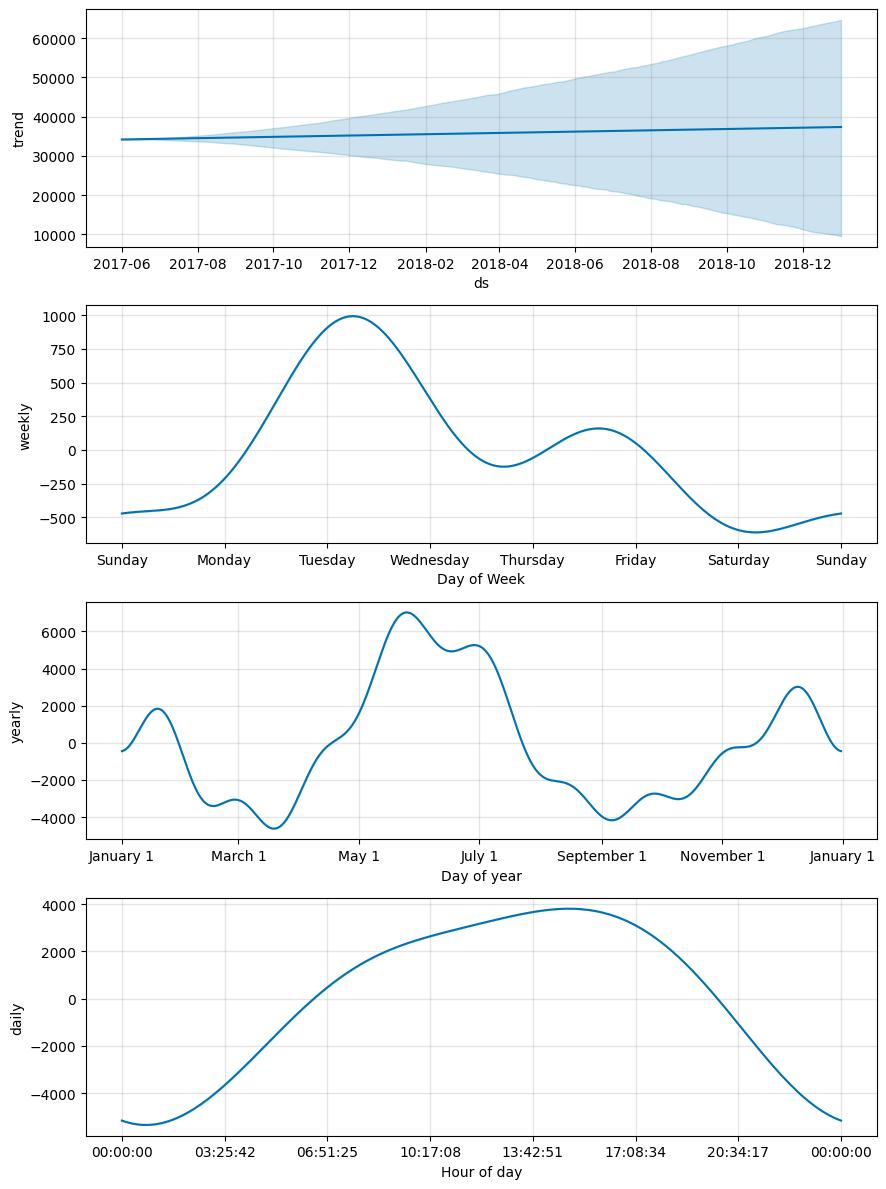

In [106]:
plot = model.plot_components(forecast)

## Performance

In [107]:
df_cv2 = cross_validation(model, horizon='180 days')

  0%|          | 0/6 [00:00<?, ?it/s]21:31:04 - cmdstanpy - INFO - Chain [1] start processing
21:31:05 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 1/6 [00:03<00:19,  3.92s/it]21:31:08 - cmdstanpy - INFO - Chain [1] start processing
21:31:11 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 2/6 [00:09<00:20,  5.16s/it]21:31:14 - cmdstanpy - INFO - Chain [1] start processing
21:31:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 3/6 [00:21<00:24,  8.11s/it]21:31:26 - cmdstanpy - INFO - Chain [1] start processing
21:31:33 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 4/6 [00:31<00:17,  8.84s/it]21:31:36 - cmdstanpy - INFO - Chain [1] start processing
21:31:49 - cmdstanpy - INFO - Chain [1] done processing
 83%|████████▎ | 5/6 [00:47<00:11, 11.25s/it]21:31:52 - cmdstanpy - INFO - Chain [1] start processing
21:32:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 6/6 [01:01<00:00, 10.17s/it]


In [112]:
df_p = performance_metrics(df_cv2)
#df_p.head()

In [111]:
# Calculate MAE
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
print("MAE:", mae)

MAE: 5599.194361992975


In [113]:
# Calculate MSE
mse = mean_squared_error(test_data['y'], forecast['yhat'])
print("MSE:", mse)

MSE: 47292224.611346185


In [115]:
# Calculate MAPE
mape = mean_absolute_percentage_error(test_data['y'], forecast['yhat'])
print("MAPE:", mape)

MAPE: 0.18745161185400921


In [116]:
# Calculate R2
r2 = r2_score(test_data['y'], forecast['yhat'])
print("R2:", r2)

R2: -0.04147353922221253
